## Generating Ensembles of Pulses

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from phenom.source import SASE_Source, Source
from phenom.io import load_hdf5

## Generating a single pulse using source.SASE_Source

In [50]:
import numpy as np
from phenom.source import sase_pulse

x = np.linspace(-500e-06, 500e-06, 512)
y = np.linspace(-500e-06, 500e-06, 512)
t = np.linspace(-100e-15, 100e-15, 512)

electric_field  = sase_pulse(x = x, 
                              y = y,
                              t = t,
                              photon_energy = 9200.,
                              pulse_energy = 1e-03,
                              pulse_duration = 25e-15,
                              bandwidth = 1e-03,
                              sigma = 100e-06,
                              div = 1e-03,
                              x0 = 0.,
                              y0 = 0.,
                              t0 = 2e-15,
                              theta_x = 0,
                              theta_y = 0.                                                              
           )

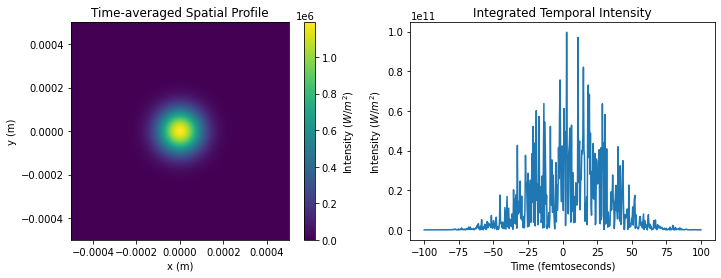

In [52]:
from matplotlib import pyplot as plt

ii = abs(electric_field)**2 ### electric-field intensity

fig, [ax1, ax2] = plt.subplots(1,2, figsize = (12,4))

ax1.set_title("Time-averaged Spatial Profile")
im1 = ax1.imshow(ii.mean(-1), extent = [x.min(), x.max(), y.min(), y.max()])
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
fig.colorbar(im1, label = "Intensity ($W/m^2$)")

ax2.set_title("Integrated Temporal Intensity")
ax2.set_xlabel("Time (femtoseconds)")
ax2.set_ylabel("Intensity ($W/m^2$)")
ax2.plot(t*1e15, ii.sum(axis = (0,1)))

In [53]:
fig.savefig("./sase_pulse_demo.png")

In [ ]:
src.generate_pulses("./tmp/sase_field.h5")

In [82]:
wf = load_hdf5("./tmp/sase_field.h5", proc = 'proc000')

#### 